In [2]:
#import all required libraries.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

from sklearn.metrics import r2_score
from scipy.stats import pearsonr

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_excel('Linear Regression.xlsx')
df.head()


,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [6]:
#we have to predict the price of flat , and price is continuous variable.
df.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [7]:
df.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


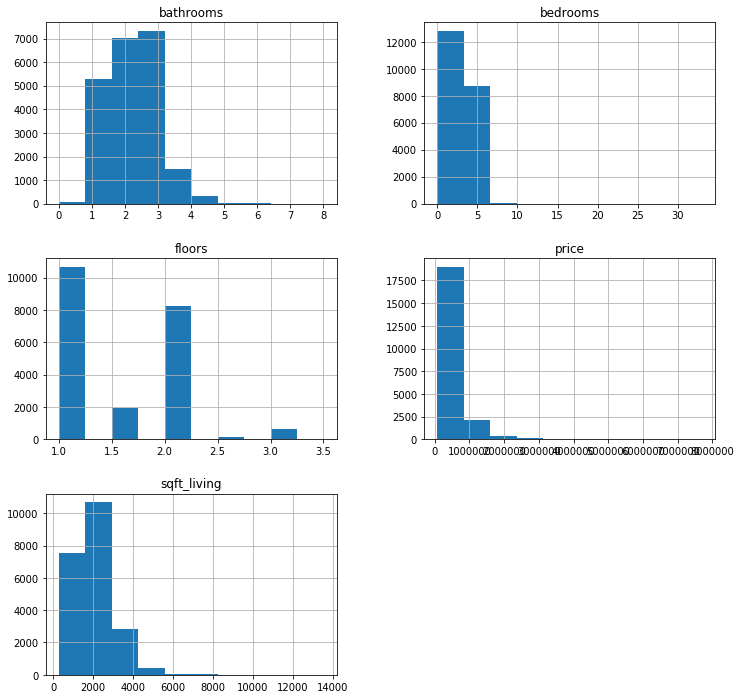

In [8]:
df.hist(figsize=(12,12))
plt.show()

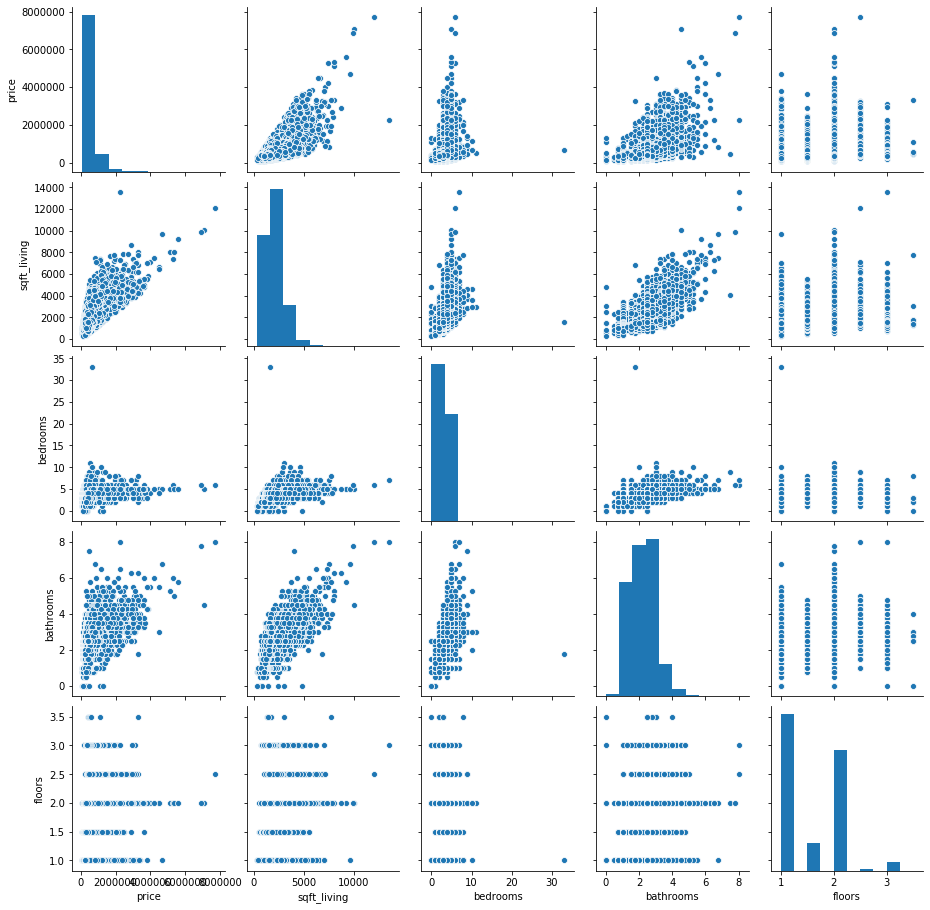

In [9]:
sns.pairplot(df)

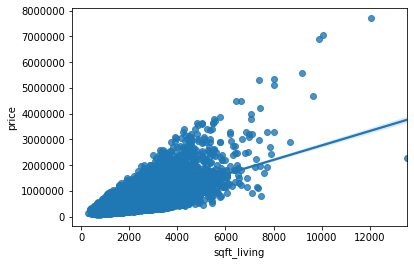

In [10]:
#Finding Relationship Between variables.
sns.regplot(df.sqft_living, df.price)

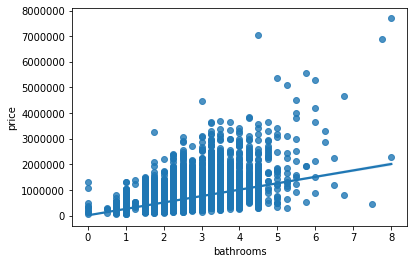

In [11]:
sns.regplot(df.bathrooms, df.price)


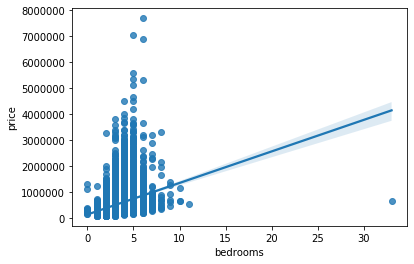

In [12]:

sns.regplot(df.bedrooms, df.price)

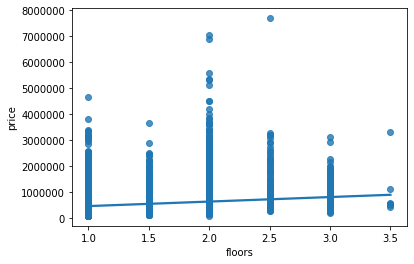

In [13]:

sns.regplot(df.floors, df.price)

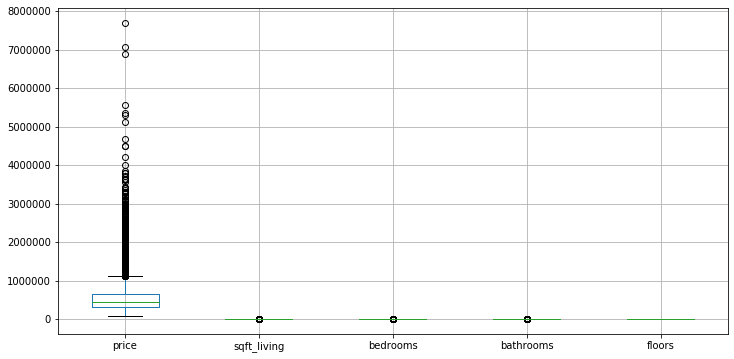

In [14]:
#Finding Outliers using Boxplot.
df.boxplot(figsize=(12,6))
plt.show()

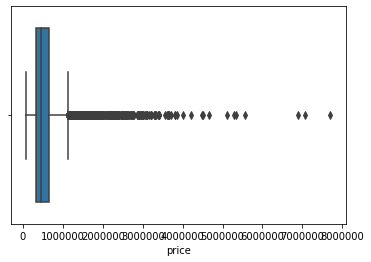

In [15]:
sns.boxplot(df['price'])

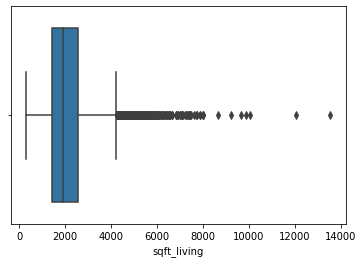

In [16]:
sns.boxplot(df['sqft_living'])

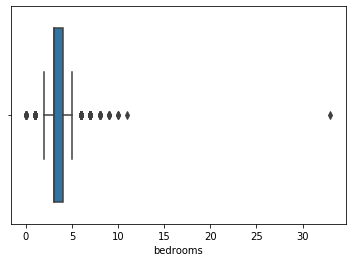

In [17]:
sns.boxplot(df['bedrooms'])

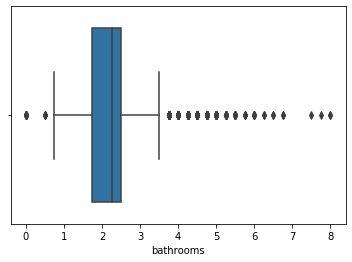

In [18]:

sns.boxplot(df['bathrooms'])

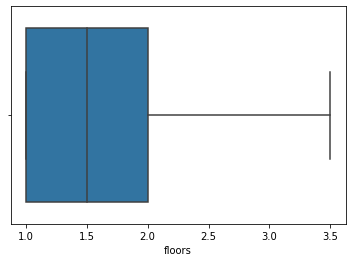

In [19]:
sns.boxplot(df['floors'])

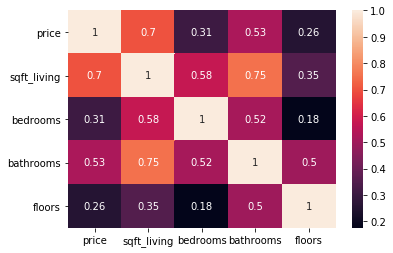

In [20]:
#correlation matrix
sns.heatmap(df.corr(),annot=True)

#Applying Linear Regression.

1-Price V/S area of living in square feet (sqft_living)


In [22]:

df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [23]:

x = df.iloc[:,1:2]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [24]:
y = df.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:

print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [-41947.45007397]
Coefficient is:  [[279.51011494]]


In [32]:
#prediction values

ypred = lin_reg.predict(x_test)
print("Predicted values:\n")
print(ypred)

Predicted values:

[[ 536638.48784377]
 [ 768631.88324074]
 [1011805.68323515]
 ...
 [ 279489.18210255]
 [ 556204.1958893 ]
 [ 659622.93841566]]


In [33]:
#calculating r-square value.
print("r square value is: ", r2_score(y_test, ypred))

r square value is:  0.48388318901296545


In [34]:
#Calculating p value

stats, p = pearsonr(df.price, df.sqft_living)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.7020350524336835 and p value is 0.0


2-price vs bedroom.

In [35]:

x1 = df.iloc[:,2:3]
x1.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [36]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [37]:

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state = 2)

In [38]:
lin_reg.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [142835.36507296]
Coefficient is:  [[118301.95858814]]


In [41]:
y_pred1 = lin_reg.predict(x1_test)
print("Predicted values:\n")
print(y_pred1)

Predicted values:

[[616043.19942552]
 [497741.24083738]
 [379439.28224924]
 ...
 [616043.19942552]
 [497741.24083738]
 [616043.19942552]]


In [42]:
#Calculating R-square value
print("The r square value is: ", r2_score(y1_test, y_pred1))

The r square value is:  0.10373065781231272


In [43]:
#Calculating p value

stats, p = pearsonr(df.price, df.bedrooms)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.30834959788482247 and p value is 0.0


3-PRICE VS BATHROOMS

In [44]:

x2 = df.iloc[:,3:4]
x2.head()

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00


In [45]:

y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [46]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y,test_size=0.3,random_state=2)

In [47]:
lin_reg.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [13513.13889573]
Coefficient is:  [[249375.03130974]]


In [49]:
y_pred2=lin_reg.predict(x2_test)
print("Predicted values:\n")
print(y_pred2)

Predicted values:

[[574606.95934264]
 [387575.68586034]
 [262888.17020547]
 ...
 [636950.71717008]
 [574606.95934264]
 [449919.44368777]]


In [50]:
#Calculating R-square value

print("The r square value is: ", r2_score(y2_test, y_pred2))

The r square value is:  0.2729690023991551


In [51]:
#Calculating p value

stats, p = pearsonr(df.price, df.bathrooms)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.5251375045796025 and p value is 0.0


4-PRICE VS FLOORS

In [52]:
x3 = df.iloc[:,4:]
x3.head()

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [53]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [54]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y,test_size=0.3,random_state=2)

In [55]:
lin_reg.fit(x3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [283855.89650181]
Coefficient is:  [[171935.92961605]]


In [57]:

y_pred3 =lin_reg.predict(x3_test)
print("Predicted values:\n")
print(y_pred3)

Predicted values:

[[541759.79092589]
 [455791.82611786]
 [455791.82611786]
 ...
 [627727.75573391]
 [627727.75573391]
 [541759.79092589]]


In [58]:
#Calculating R-square value
print("The r square value is: ", r2_score(y3_test, y_pred3))

The r square value is:  0.0687966797810432


In [59]:
#Calculating p value

stats, p = pearsonr(df.price, df.floors)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.256793884063341 and p value is 1.6e-322


5-Price as Dependent Variable and all Other Variables as Independent Variable

In [60]:

# x4=data.iloc[:,1:5]

x4 = df.drop(['price'], axis=1)
x4.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [61]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [62]:

x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y,test_size=0.3,random_state=2)

In [63]:
lin_reg.fit(x4_train,y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [73808.86183529]
Coefficient is:  [[   306.72838252 -55720.77178327   8705.50888837   -266.52957882]]


In [65]:

y_pred4 = lin_reg.predict(x4_test)
print("Predicted values:\n")
print(y_pred4)

Predicted values:

[[609328.77721079]
 [585038.87031192]
 [415562.45223517]
 ...
 [599102.75434259]
 [339784.19873135]
 [516024.79183523]]


In [67]:
#Calculating R-square value

print("The r square value is: ", r2_score(y4_test, y_pred4))

The r square value is:  0.5105722437453338
